# 재료의 조성에 따른 물리적 성질의 상관관계를 분석
---

데이터는 강철의 한 종류인 탄소강에 성질을 개량하기 위해 특수한 원소를 첨가한 특수강의 조성과 물리적 특성이 담겨있습니다.

물성의 관계를 확인하고 데이터를 바탕으로 예측 합니다.

### 왜 물리적 성질을 측정하고 상관관계를 분석하는가

* 재료의 기계적 성질은 일상적으로 사용하는 정적인 성질과는 다릅니다.
* 각 용도에 맞는 재료를 선택하기 위해 가공성, 안전성, 적합성을 판단하는데 사용됩니다.
* 각 물리적 성질의 관계 데이터를 통해 비슷한 조성을 가지는 재료의 특성을 유추할 수 있습니다.


### scipy.stats 사용
데이터의 관계를 통계를 통해 확인하고 검증하기 위해 사용했습니다.
검증된 데이터를 바탕으로 그래프로 시각화 했습니다.

In [ ]:
%config InlineBackend.figure_format = 'retina'

!apt -qq -y install fonts-nanum

fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 62 not upgraded.


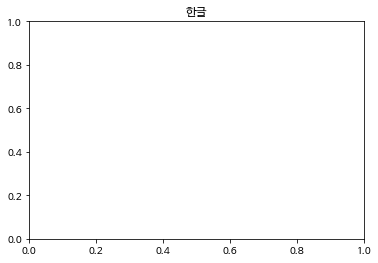

In [ ]:
import scipy.stats as st
from scipy.stats import skew, kurtosis
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.metrics import accuracy_score
from math import sqrt

fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()

plt.title('한글')
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# 데이터를 읽어옵니다.
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/수업자료/자료/Mechanical properties of low-alloy steels.csv', encoding = 'cp949')
data

,癤풞lloy code,C,Si,Mn,P,S,Ni,Cr,Mo,Cu,V,Al,N,Ceq,Nb + Ta,Temperature (째C),0.2% Proof Stress (MPa),Tensile Strength (MPa),Elongation (%),Reduction in Area (%)
0,MBB,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.610,0.04,0.000,0.003,0.0066,0.0,0.0000,27,342,490,30,71
1,MBB,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.610,0.04,0.000,0.003,0.0066,0.0,0.0000,100,338,454,27,72
2,MBB,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.610,0.04,0.000,0.003,0.0066,0.0,0.0000,200,337,465,23,69
3,MBB,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.610,0.04,0.000,0.003,0.0066,0.0,0.0000,300,346,495,21,70
4,MBB,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.610,0.04,0.000,0.003,0.0066,0.0,0.0000,400,316,489,26,79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
910,CCB,0.22,0.22,1.24,0.021,0.008,0.030,0.05,0.017,0.01,0.005,0.005,0.0116,0.0,0.0017,350,268,632,28,65
911,CCB,0.22,0.22,1.24,0.021,0.008,0.030,0.05,0.017,0.01,0.005,0.005,0.0116,0.0,0.0017,400,244,575,28,68
912,CCB,0.22,0.22,1.24,0.021,0.008,0.030,0.05,0.017,0.01,0.005,0.005,0.0116,0.0,0.0017,450,224,500,29,72
913,CCB,0.22,0.22,1.24,0.021,0.008,0.030,0.05,0.017,0.01,0.005,0.005,0.0116,0.0,0.0017,500,209,428,30,78


In [ ]:
data.columns

Index(['癤풞lloy code', ' C', ' Si', ' Mn', ' P', ' S', ' Ni', ' Cr', ' Mo',
       ' Cu', 'V', ' Al', ' N', 'Ceq', 'Nb + Ta', ' Temperature (째C)',
       ' 0.2% Proof Stress (MPa)', ' Tensile Strength (MPa)',
       ' Elongation (%)', ' Reduction in Area (%)'],
      dtype='object')

In [ ]:
# 불필요한 열 삭제 및 열 이름을 변경합니다.
dt2 = data.drop(['癤풞lloy code'],axis = 1)
dt2.columns = ['C', 'Si', 'Mn', 'P', 'S', 'Ni', 'Cr', 'Mo',
       'Cu', 'V', 'Al', 'N', 'Ceq', 'Nb + Ta', 'Temperature',
       '0.2% Proof Stress (MPa)', 'Tensile Strength (MPa)',
       'Elongation (%)', 'Reduction in Area (%)']
dt2.head()

,C,Si,Mn,P,S,Ni,Cr,Mo,Cu,V,Al,N,Ceq,Nb + Ta,Temperature,0.2% Proof Stress (MPa),Tensile Strength (MPa),Elongation (%),Reduction in Area (%)
0,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.04,0.0,0.003,0.0066,0.0,0.0,27,342,490,30,71
1,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.04,0.0,0.003,0.0066,0.0,0.0,100,338,454,27,72
2,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.04,0.0,0.003,0.0066,0.0,0.0,200,337,465,23,69
3,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.04,0.0,0.003,0.0066,0.0,0.0,300,346,495,21,70
4,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.04,0.0,0.003,0.0066,0.0,0.0,400,316,489,26,79


In [ ]:
# 결측치가 있는지 확인합니다.
dt2.isnull().sum(axis = 1)

0      0
1      0
2      0
3      0
4      0
      ..
910    0
911    0
912    0
913    0
914    0
Length: 915, dtype: int64

In [ ]:
dt2.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
910    False
911    False
912    False
913    False
914    False
Length: 915, dtype: bool

In [ ]:
# 성분치와 특성으로 데이터를 분리합니다.
p1 = dt2.iloc[:,:-5]
p2 = dt2.iloc[:,-5:]

In [ ]:
p1.head()

,C,Si,Mn,P,S,Ni,Cr,Mo,Cu,V,Al,N,Ceq,Nb + Ta
0,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.04,0.0,0.003,0.0066,0.0,0.0
1,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.04,0.0,0.003,0.0066,0.0,0.0
2,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.04,0.0,0.003,0.0066,0.0,0.0
3,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.04,0.0,0.003,0.0066,0.0,0.0
4,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.04,0.0,0.003,0.0066,0.0,0.0


In [ ]:
p2.head()

,Temperature,0.2% Proof Stress (MPa),Tensile Strength (MPa),Elongation (%),Reduction in Area (%)
0,27,342,490,30,71
1,100,338,454,27,72
2,200,337,465,23,69
3,300,346,495,21,70
4,400,316,489,26,79


In [ ]:
# 데이터의 분포를 분석합니다.

In [ ]:
# number의 데이터 타입을 가진 열을 고르기 위해서 사용했습니다.
cols = p1.select_dtypes(include = np.number).columns
lt = cols
lt2 = p2.columns

In [ ]:
# 함수를 이용해 각 성분의 분포를 히스토그램으로 확인합니다.
# V, Ceq, Nb + Ta 의 경우, 한 구간에 몰려있고 갯수가 다른 원소에 비해 적습니다.
def plot(p1,le):
  for col in le:
    ds = p1[col].sort_values()
    plt.figure(figsize = (10,5))
    sns.histplot(data = ds, cumulative=True, label='cumulative=True')
    sns.histplot(data = ds, cumulative=False, label='cumulative=False')
    plt.title(f"{col}\tskewness: {ds.skew():.2f}")
    plt.legend(bbox_to_anchor = (1.0, 1.0), loc = 'upper left')
    plt.show()

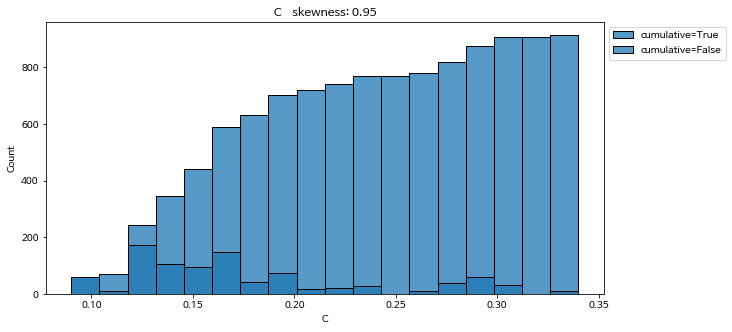

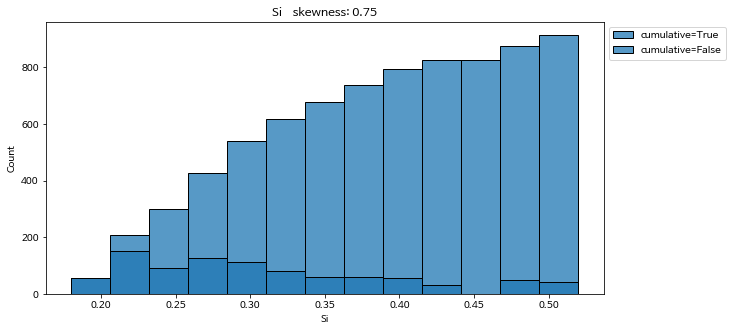

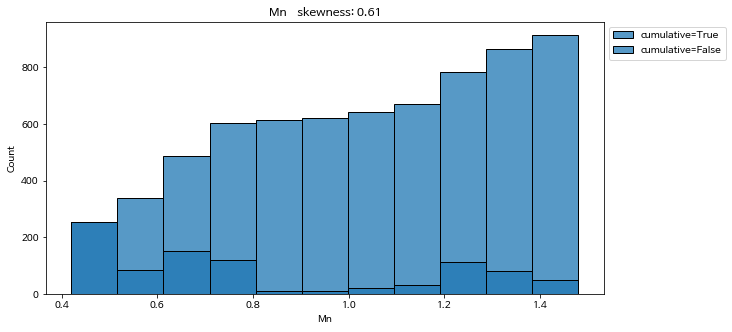

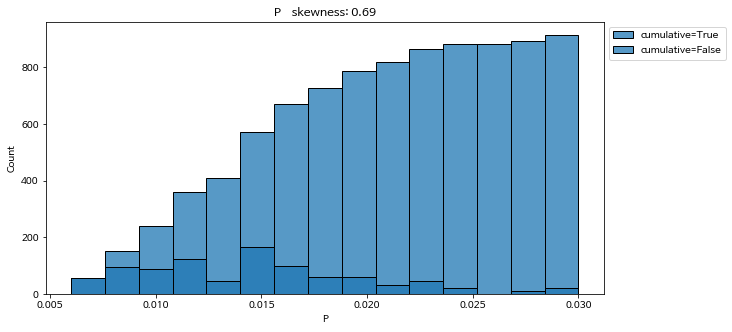

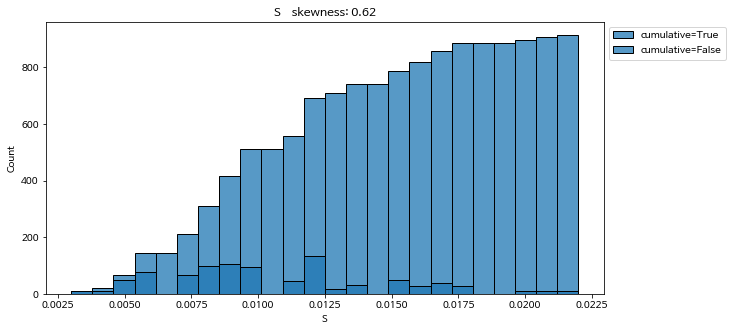

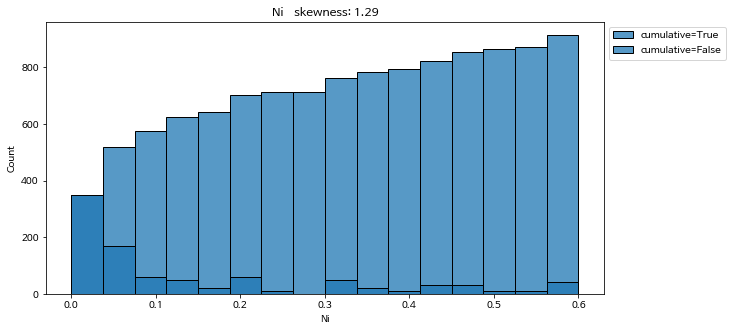

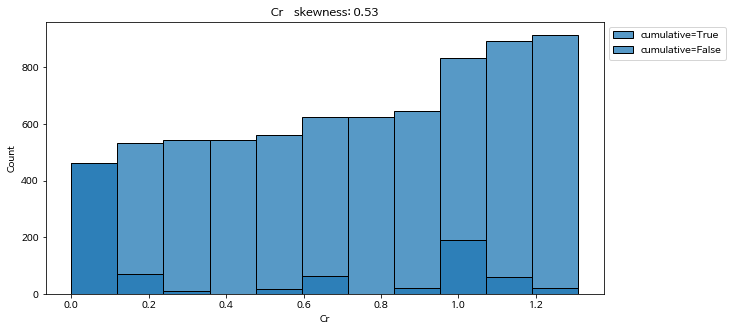

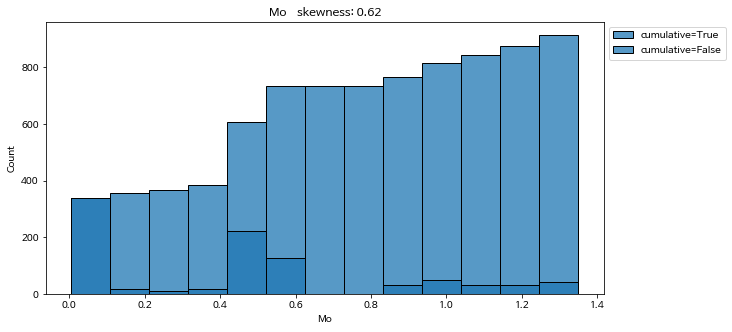

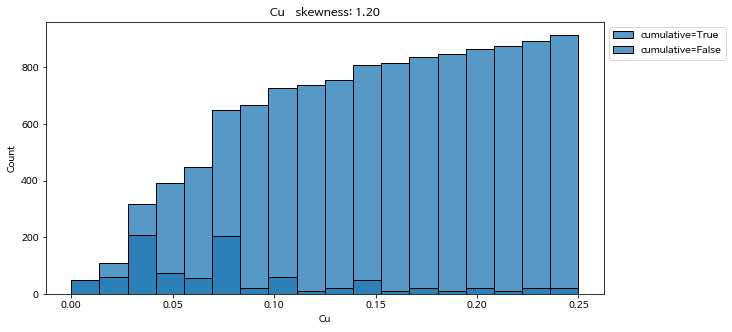

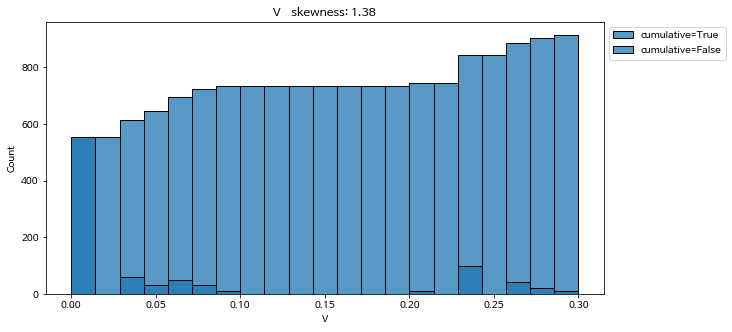

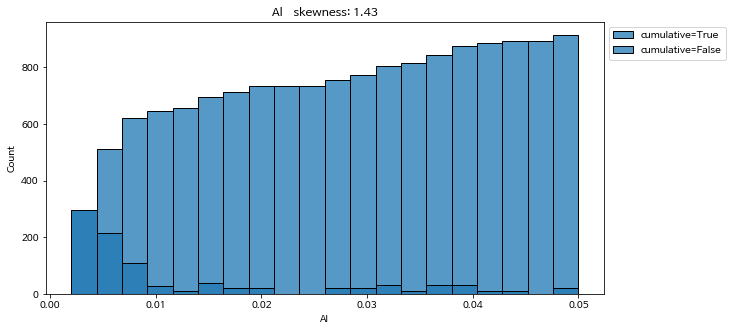

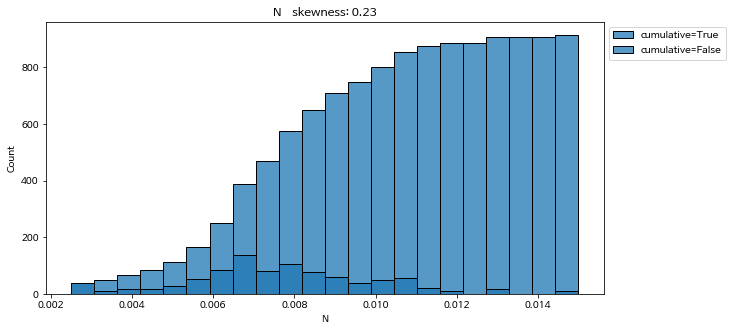

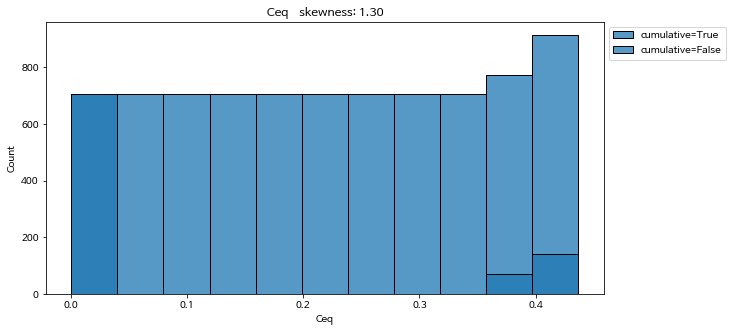

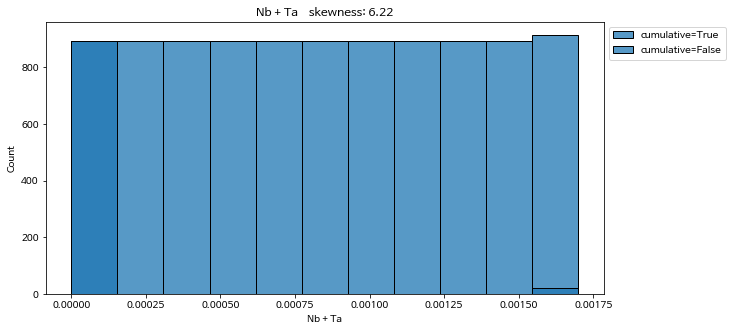

In [ ]:
plot(p1, lt)

In [ ]:
# 열 방향으로 데이터의 왜도 확인
# scipy 활용해서 왜도,첨도 계산
def skk(p1,le):
  for col in le:
    skew = p1[col].skew()
    kurt = p1[col].kurt()
    print(f'{col} -> skew: {skew:.2f}, kurt: {kurt:.2f}')

In [ ]:
skk(p1,lt)

C -> skew: 0.95, kurt: -0.08
Si -> skew: 0.75, kurt: -0.20
Mn -> skew: 0.61, kurt: -1.20
P -> skew: 0.69, kurt: 0.35
S -> skew: 0.62, kurt: -0.09
Ni -> skew: 1.29, kurt: 0.39
Cr -> skew: 0.53, kurt: -1.51
Mo -> skew: 0.62, kurt: -0.62
Cu -> skew: 1.20, kurt: 0.84
V -> skew: 1.38, kurt: 0.22
Al -> skew: 1.43, kurt: 0.70
N -> skew: 0.23, kurt: 0.40
Ceq -> skew: 1.30, kurt: -0.30
Nb + Ta -> skew: 6.22, kurt: 36.82


In [ ]:
# 데이터를 로그로 변환하여 더 확실한 결과를 보임.
def logskk(p1,le):
  for col in le:
    skew = np.log1p(p1[col]).skew()
    kurt = np.log1p(p1[col]).kurt()
    print(f'log scale {col} -> skew: {skew:.2f}, kurt: {kurt:.2f}')

In [ ]:
logskk(p1,lt)

log scale C -> skew: 0.87, kurt: -0.20
log scale Si -> skew: 0.64, kurt: -0.39
log scale Mn -> skew: 0.48, kurt: -1.30
log scale P -> skew: 0.67, kurt: 0.32
log scale S -> skew: 0.61, kurt: -0.10
log scale Ni -> skew: 1.14, kurt: -0.02
log scale Cr -> skew: 0.45, kurt: -1.63
log scale Mo -> skew: 0.26, kurt: -1.10
log scale Cu -> skew: 1.09, kurt: 0.57
log scale V -> skew: 1.34, kurt: 0.12
log scale Al -> skew: 1.42, kurt: 0.66
log scale N -> skew: 0.22, kurt: 0.39
log scale Ceq -> skew: 1.30, kurt: -0.31
log scale Nb + Ta -> skew: 6.22, kurt: 36.82


In [ ]:
# 로그 스케일의 데이터 분포
def logplot(p1,le):
  for col in le:
    plt.figure(figsize = (12,8))
    temp = np.log1p(p1)
    sns.histplot(data = temp[col], cumulative=True, label='cumulative=True')
    sns.histplot(data = temp[col], cumulative=False, label='cumulative=False')
    plt.title(f"{col} skewness: {temp[col].skew():.2f}")
    plt.legend(bbox_to_anchor = (1.0, 1.0), loc = 'upper left')
    plt.show()

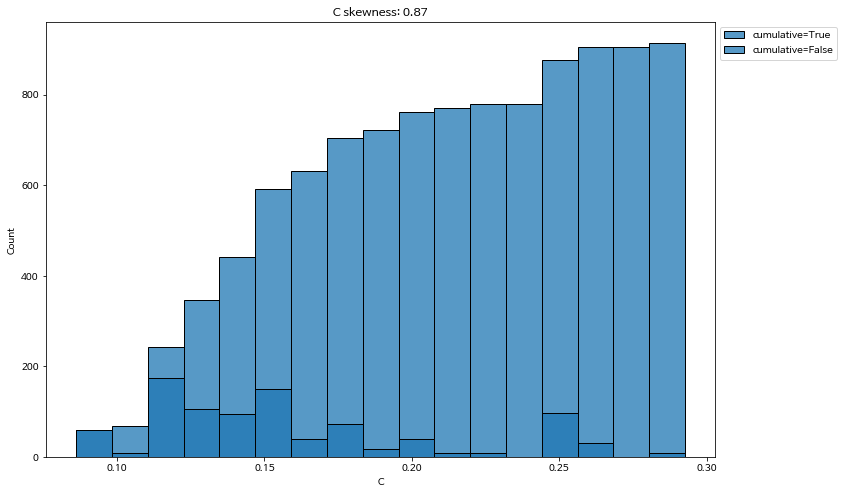

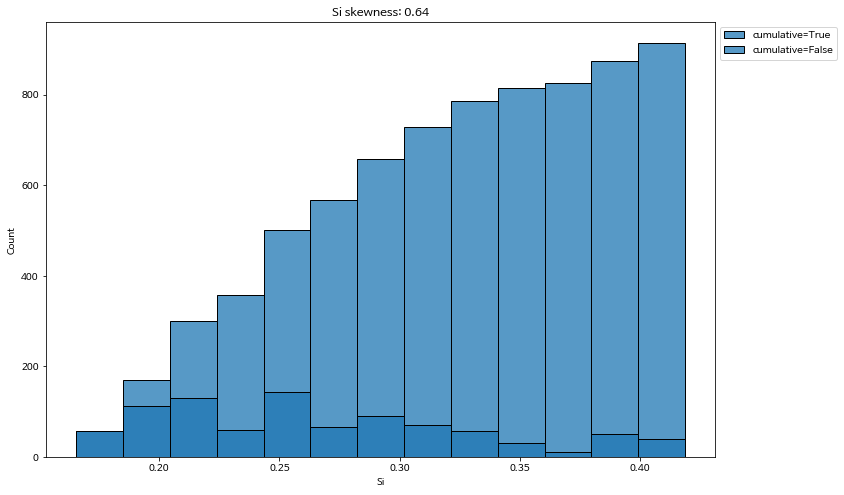

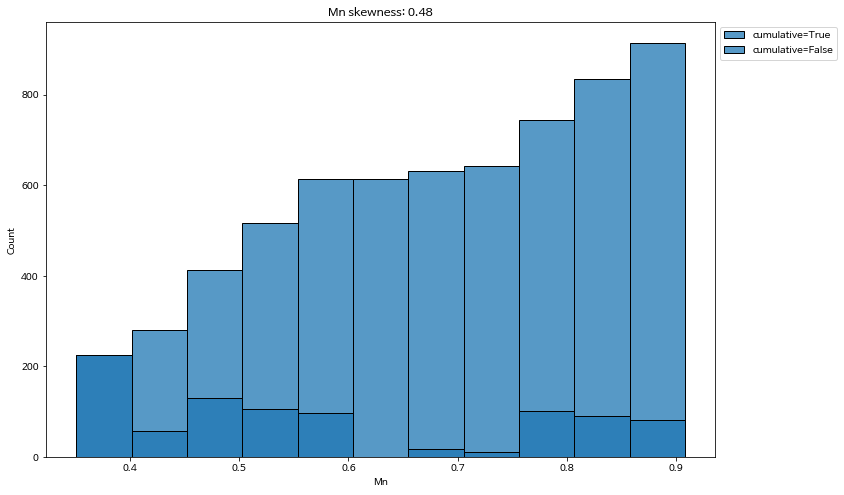

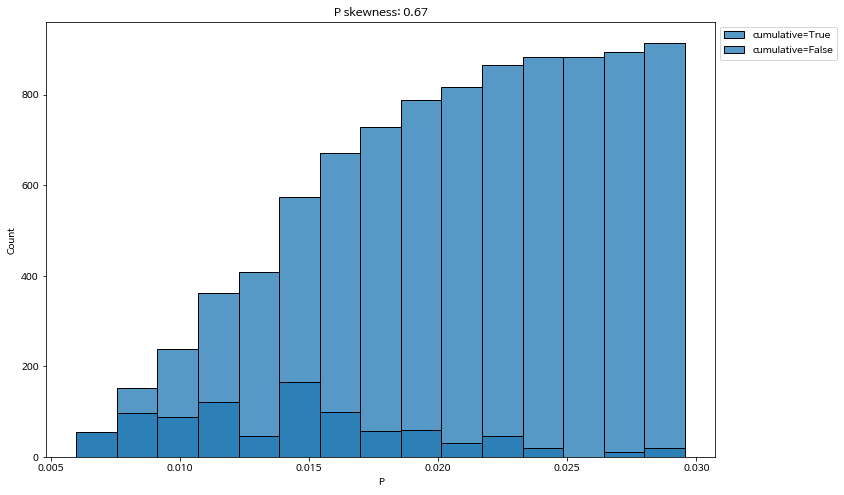

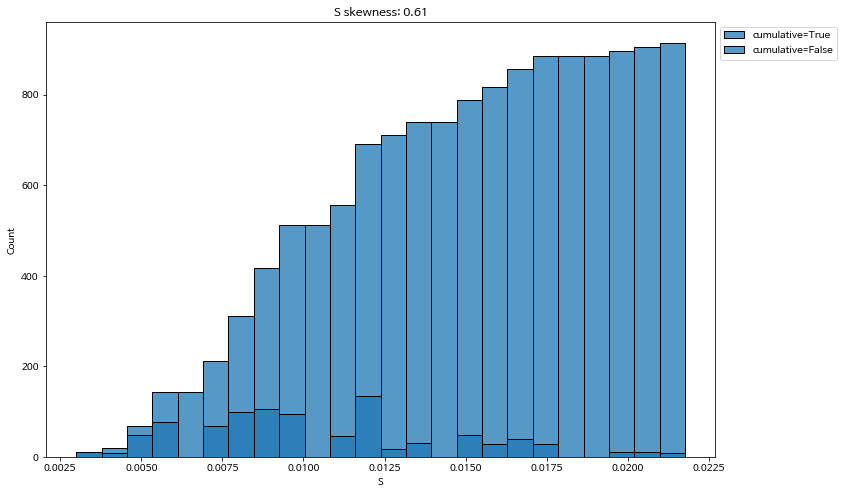

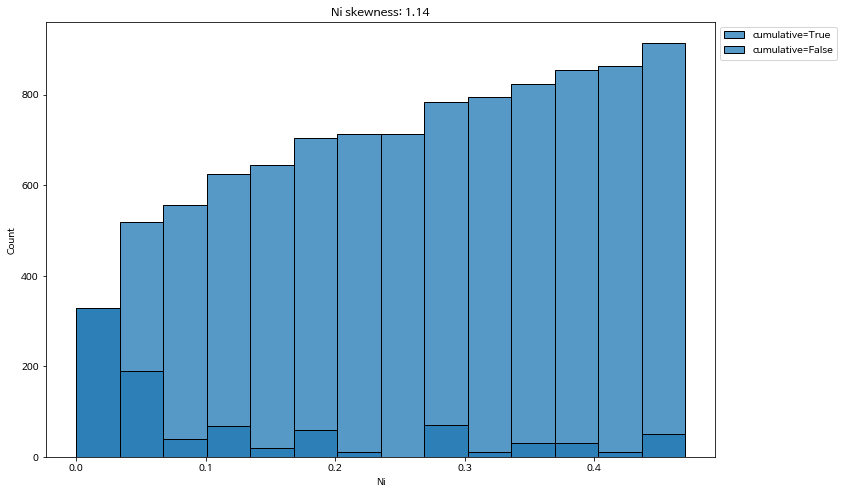

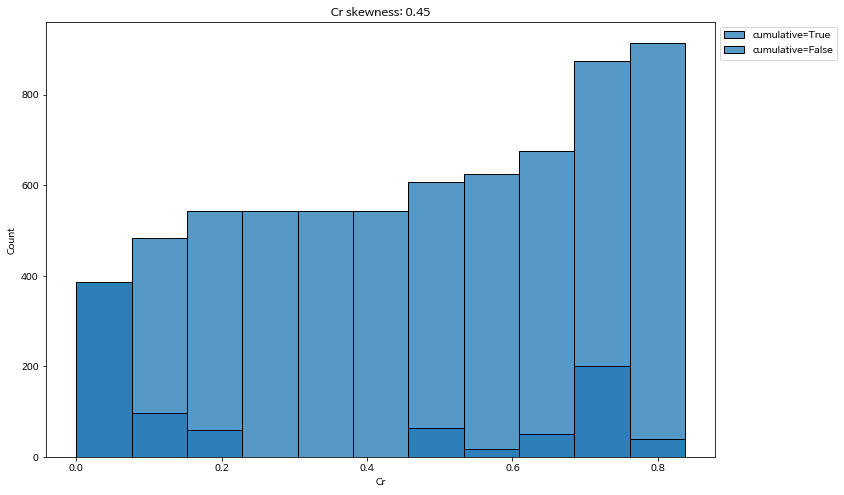

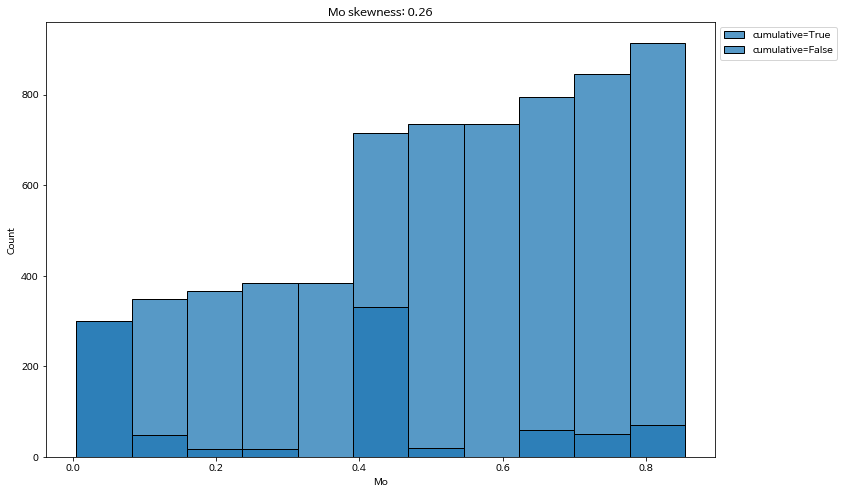

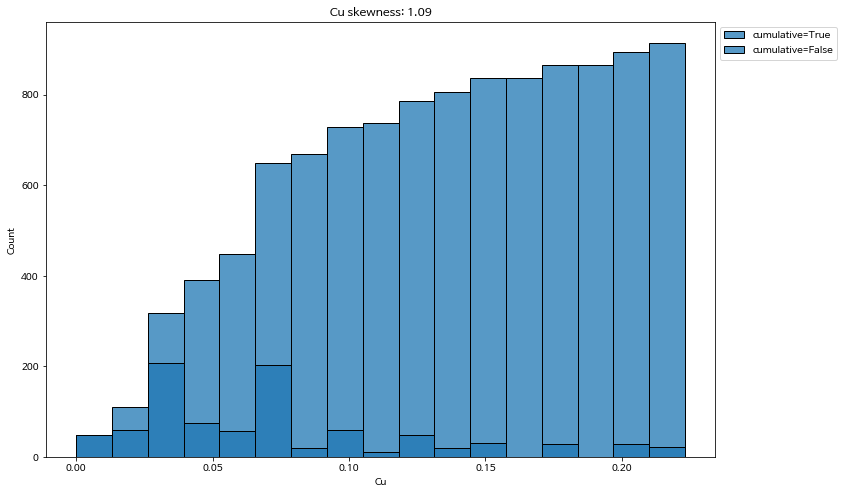

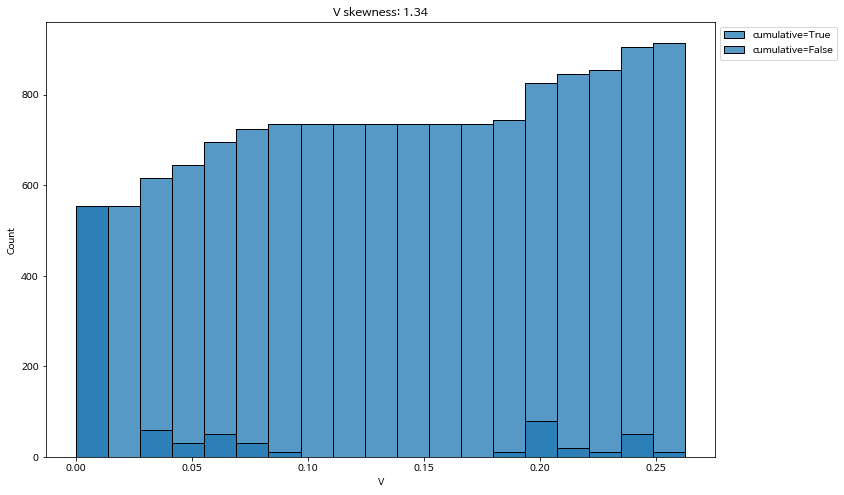

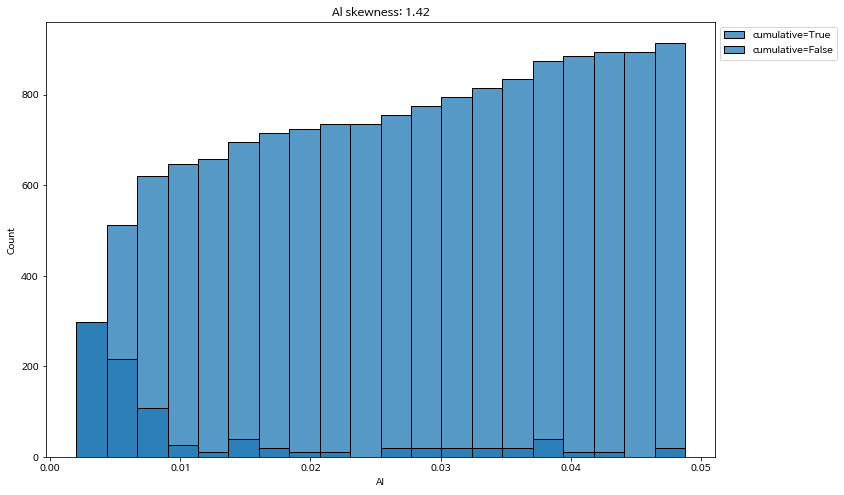

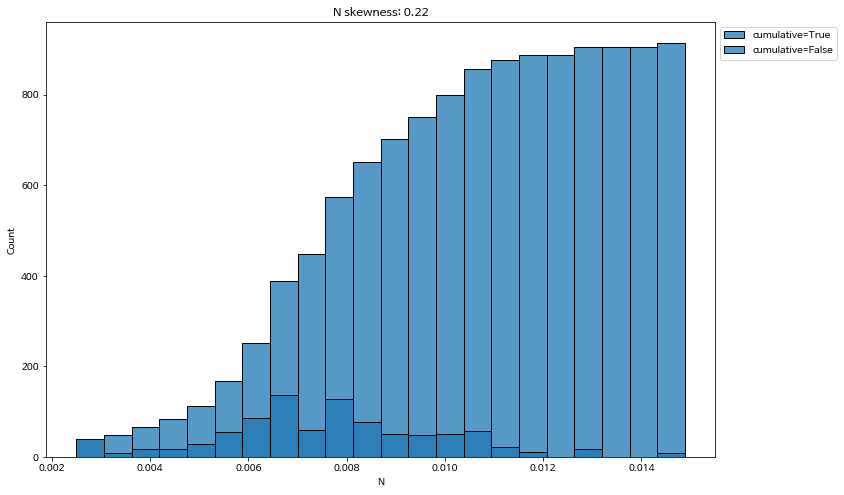

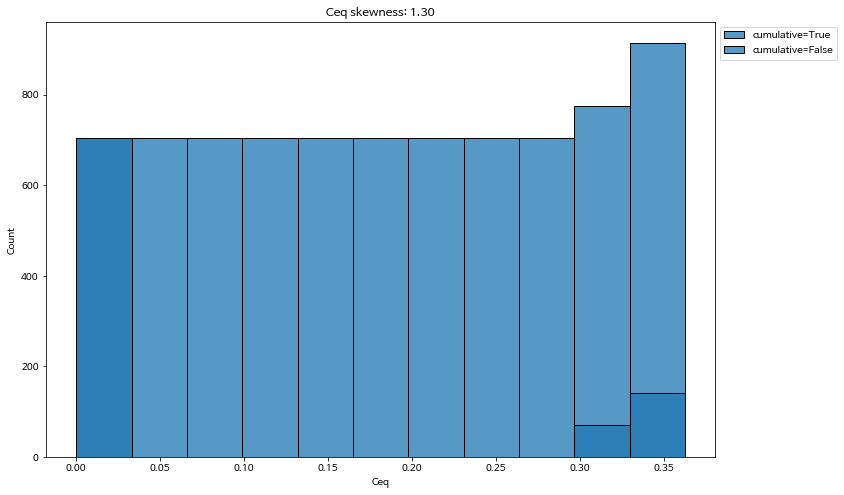

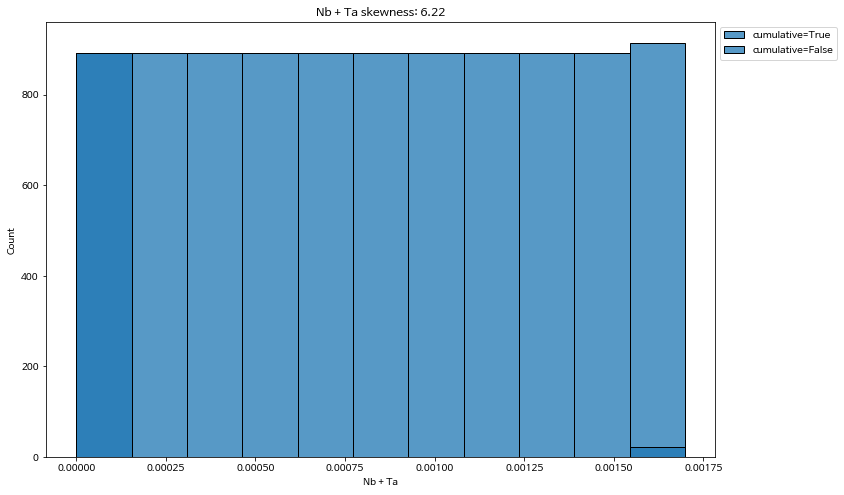

In [ ]:
logplot(p1,lt)

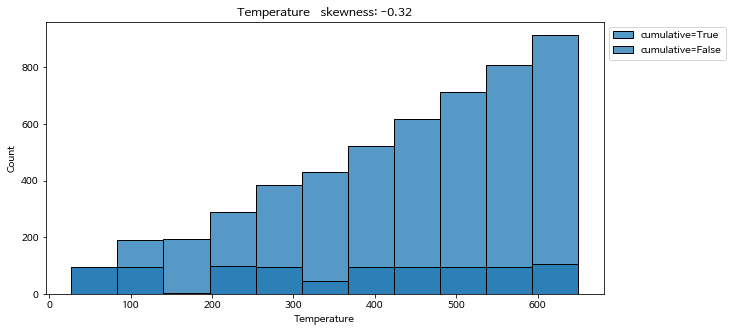

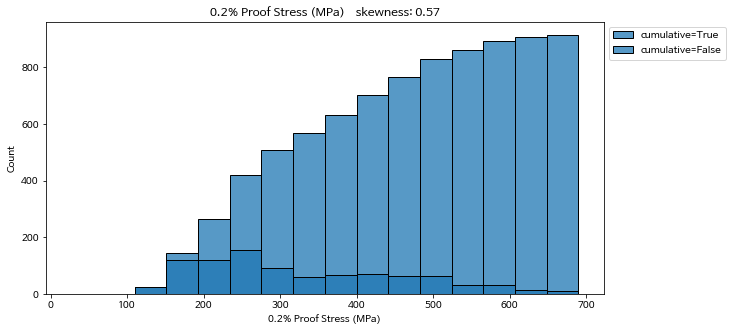

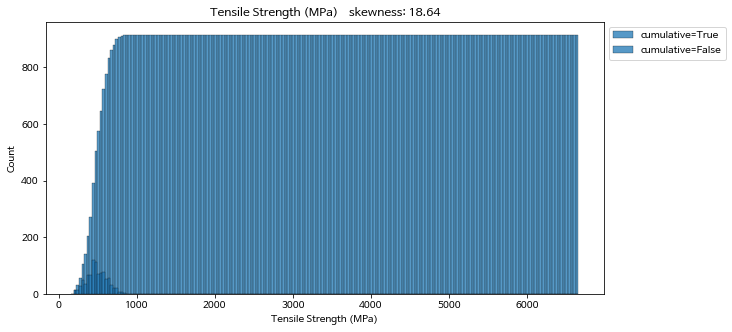

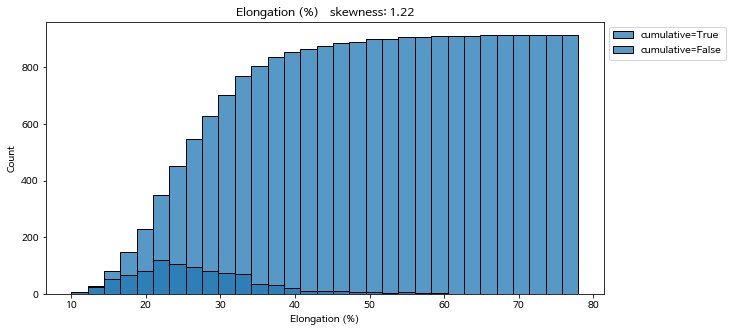

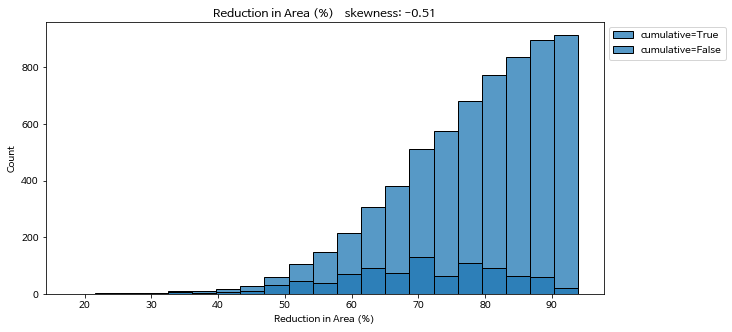

In [64]:
# 영상에서는 설명하지 않았던 부분입니다.
# 각 특성에 대한 히스토그램으로 나타냈고, tensile strength 와 elongation에서 이상치가 보입니다.
plot(p2,lt2)

In [ ]:
# 전체 데이터의 관계를 확인합니다.
dt3 = dt2

for col in dt2.columns:
  for item in dt2[col]:
    if abs(item) >= 0.4:
      dt3[col] = np.log1p(dt2[col])

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


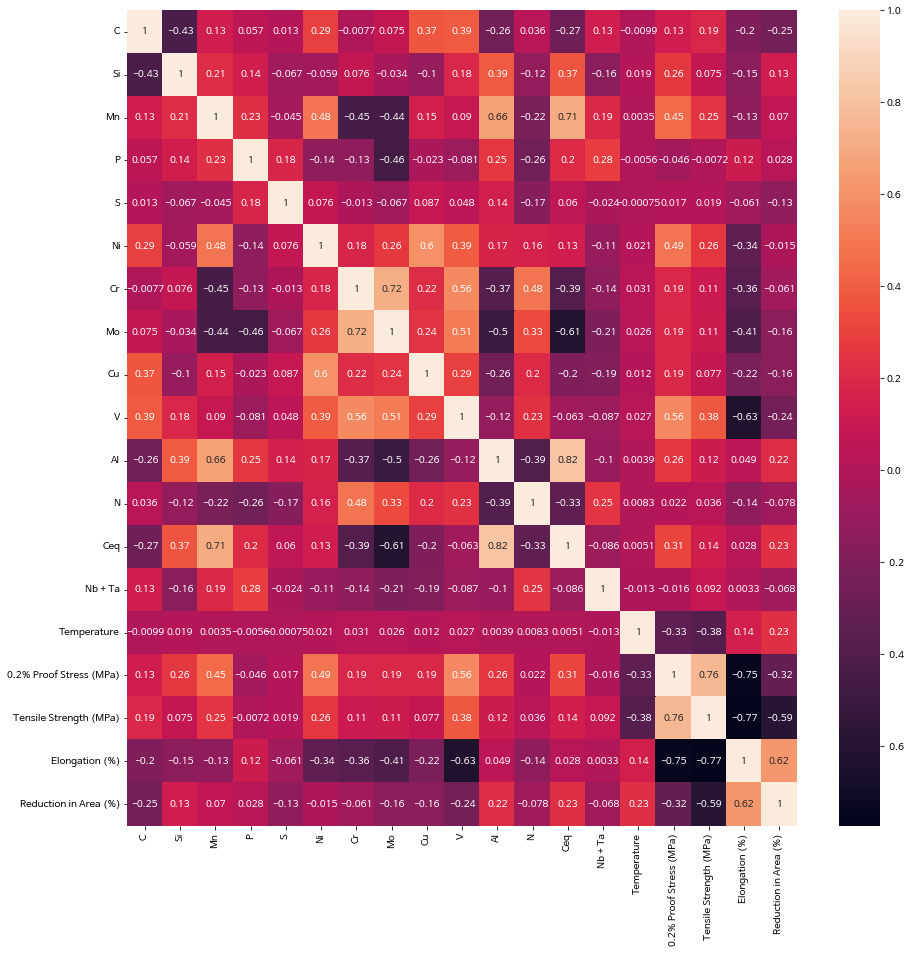

In [ ]:
# heatmap 결과에 의하면
# 1. elogation은 V,Mo, Cr, Ni와 상관관계를 가집니다.
# 2. tensile strength는 V와 상관관계를 가집니다.
# 3. 0.2% proof stress는 Ceq, V, Ni, Mn과 상관관계를 가집니다.
plt.figure(figsize = (15,15))
sns.heatmap(dt2.corr(), annot = True)

In [ ]:
# 데이터를 로그로 변환합니다.
p1log = p1

for col in lt:
  for item in p1[col]:
    if abs(item) >= 0.4:
      p1log[col] = np.log1p(p1[col])

In [ ]:
p2

,Temperature,0.2% Proof Stress (MPa),Tensile Strength (MPa),Elongation (%),Reduction in Area (%)
0,27,342,490,30,71
1,100,338,454,27,72
2,200,337,465,23,69
3,300,346,495,21,70
4,400,316,489,26,79
...,...,...,...,...,...
910,350,268,632,28,65
911,400,244,575,28,68
912,450,224,500,29,72
913,500,209,428,30,78


In [ ]:
# 특성 열간 상관계수를 계산합니다.
p2.corr()

,Temperature,0.2% Proof Stress (MPa),Tensile Strength (MPa),Elongation (%),Reduction in Area (%)
Temperature,1.000000,-0.428210,-0.328002,0.407870,0.565359
0.2% Proof Stress (MPa),-0.428210,1.000000,0.480379,-0.713544,-0.371440
Tensile Strength (MPa),-0.328002,0.480379,1.000000,-0.459274,-0.437164
Elongation (%),0.407870,-0.713544,-0.459274,1.000000,0.604215
Reduction in Area (%),0.565359,-0.371440,-0.437164,0.604215,1.000000


In [ ]:
# stats 모듈을 사용한 피어슨 상관계수 계산과 np를 활용한 계산의 결과가 거의 일치했습니다.
for i in lt2:
  for j in lt2:
    print( f"{i} & {j} => {st.pearsonr(p2[i],p2[j])}")

Temperature & Temperature => (1.0, 0.0)
Temperature & 0.2% Proof Stress (MPa) => (-0.4282097603406285, 4.2555693017408916e-42)
Temperature & Tensile Strength (MPa) => (-0.32800240910988543, 2.1652109083845837e-24)
Temperature & Elongation (%) => (0.40787005951558614, 5.443797258091638e-38)
Temperature & Reduction in Area (%) => (0.5653589934654485, 2.071046631746262e-78)
0.2% Proof Stress (MPa) & Temperature => (-0.4282097603406285, 4.2555693017408916e-42)
0.2% Proof Stress (MPa) & 0.2% Proof Stress (MPa) => (0.9999999999999999, 0.0)
0.2% Proof Stress (MPa) & Tensile Strength (MPa) => (0.48037935911814234, 5.30342535097005e-54)
0.2% Proof Stress (MPa) & Elongation (%) => (-0.7135443156915887, 3.0736533528029695e-143)
0.2% Proof Stress (MPa) & Reduction in Area (%) => (-0.3714396850164107, 2.602173024969378e-31)
Tensile Strength (MPa) & Temperature => (-0.32800240910988543, 2.1652109083845837e-24)
Tensile Strength (MPa) & 0.2% Proof Stress (MPa) => (0.48037935911814234, 5.30342535097005

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


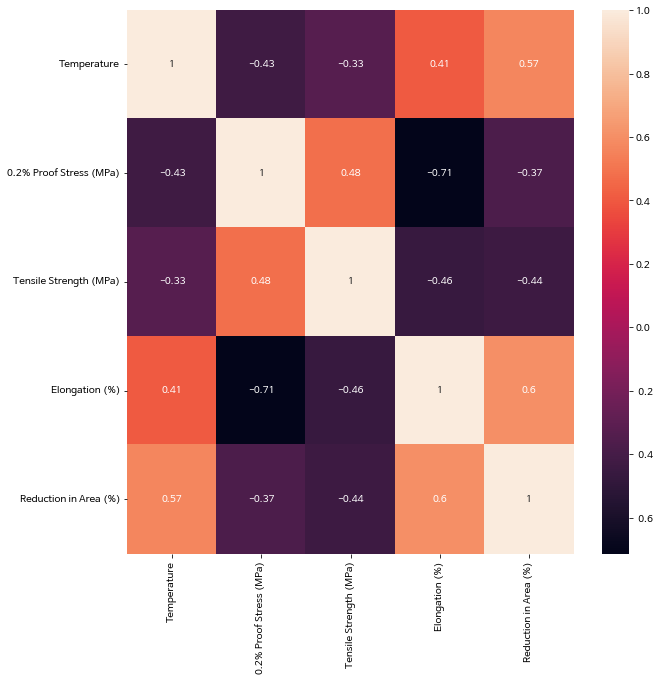

In [ ]:
# 상관계수로 heatmap 나타냅니다.
# 절대값이 0.5를 넘는 관계는 양의 관계나 음의 관계가 강함을 의미합니다.
# temperture은 elongation & reduction in area와 상관관계를 가집니다.
# 0.2% proof stress는 tensile strength & elongation과
# tensile strength는 0.2% proof stress & elongation & reduction in area과
# elongation은 reduction in area와 상관관계를 가집니다.

plt.figure(figsize = (10,10))
sns.heatmap(p2.corr(), annot = True)

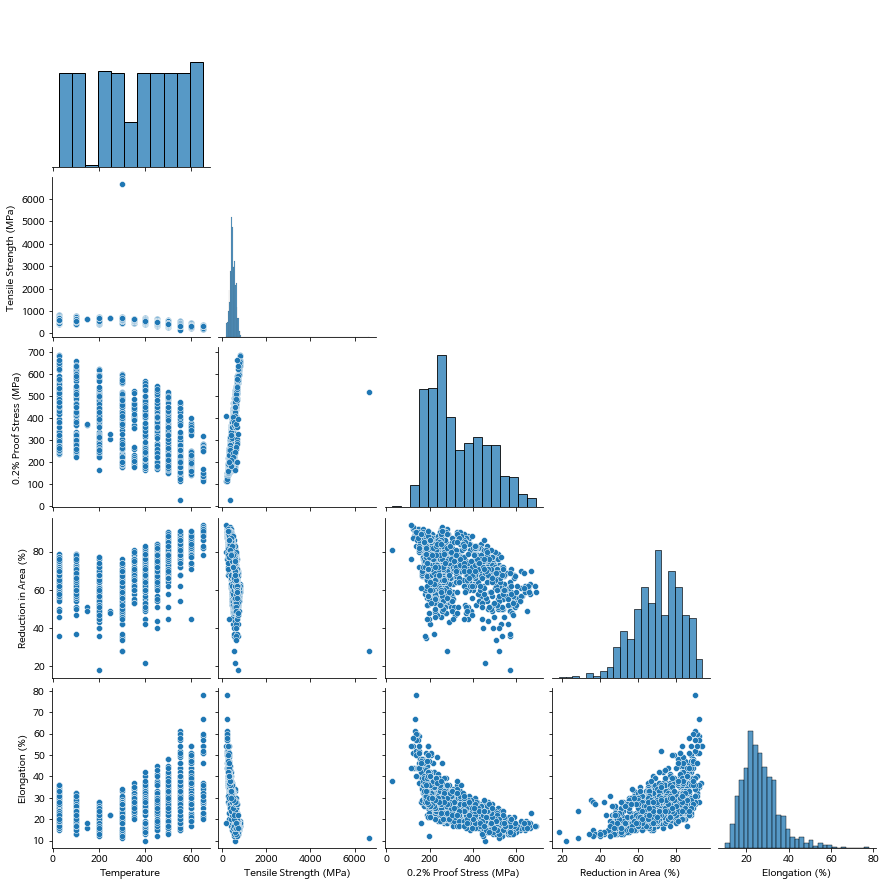

In [ ]:
# scatterplot으로 시각화.
# scatter로 확인한 결과 temperture은 상관계수에 비해 상관관계를 명확히 보이지 않음을 확인했습니다.
#  tensile strength 와 elongation에서 이상치를 다시 한 번 확인합니다.

pp2 = p2[['Temperature','Tensile Strength (MPa)','0.2% Proof Stress (MPa)','Reduction in Area (%)','Elongation (%)']]
sns.pairplot(data = pp2, corner = True)
plt.show()

In [ ]:
#이상치를 찾아서 제거하는 과정을 거쳤다면 더 확실한 결과를 얻을 수 있읐

## Random Forest Regression 

In [ ]:
# 성분값과 특성값을 분리
x = dt2.iloc[:,:14].values
y = dt2.iloc[:,15:].values

In [ ]:
# 데이터 랜덤 추출
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, shuffle = True, random_state = 2)

In [ ]:
# 전처리
sc_x = StandardScaler()
sc_x.fit(x_train)
x_train_sc = sc_x.transform(x_train)
x_test_sc = sc_x.transform(x_test)

In [ ]:
sc_y = StandardScaler()
sc_y.fit(y_train)
y_train_sc = sc_y.transform(y_train)
y_test_sc = sc_y.transform(y_test)

In [ ]:
a_stress = np.transpose(y_test)[0]
a_tensile_strength = np.transpose(y_test)[1]
a_elongation = np.transpose(y_test)[2]
a_reduction_area = np.transpose(y_test)[3]

In [ ]:
# 다음 데이터를 가지고 Random Forest Regressor를 사용해 temperature를 제외한 특성을 예측하는 모델 작성.
params = {
    'n_estimators':(100, 200),
    'max_depth' : (5, 10),
    'min_samples_leaf' : (8, 20),
    'min_samples_split' : (8, 20)
}

regressor = RandomForestRegressor(random_state = 0, n_jobs = -1)
grid_cv = GridSearchCV(regressor, param_grid=params, cv=2, n_jobs=-1)
grid_cv.fit(x_train_sc, y_train_sc)

print(grid_cv.best_params_)
print(grid_cv.best_score_)

{'max_depth': 10, 'min_samples_leaf': 20, 'min_samples_split': 8, 'n_estimators': 200}
0.29766036337319696


In [ ]:
R_regressor = RandomForestRegressor(random_state = 0, max_depth = 5, min_samples_leaf = 18, min_samples_split = 16, n_estimators = 2000,max_features = 'auto' )
R_regressor.fit(x_train_sc,y_train_sc)
y_predict = R_regressor.predict(x_test_sc)

r2 = r2_score(y_test_sc, y_predict)
mserlt = sqrt(mean_squared_error(y_test_sc, y_predict))
maerlt = sqrt(mean_absolute_error(y_test_sc, y_predict))

print('r2_score = ' + str(r2))
print('mse = ' + str(mserlt))
print('mae = ' + str(maerlt))

r2_score = 0.34807347177063597
mse = 0.7789234220488098
mae = 0.7529365757716171


In [ ]:
y_pred = sc_y.inverse_transform(y_predict)

predict_stress = np.transpose(y_pred)[0]
predict_tensile_strength = np.transpose(y_pred)[1]
predict_elongation = np.transpose(y_pred)[2]
predict_reduction_area = np.transpose(y_pred)[3]

Text(0, 0.5, '실데이터')

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


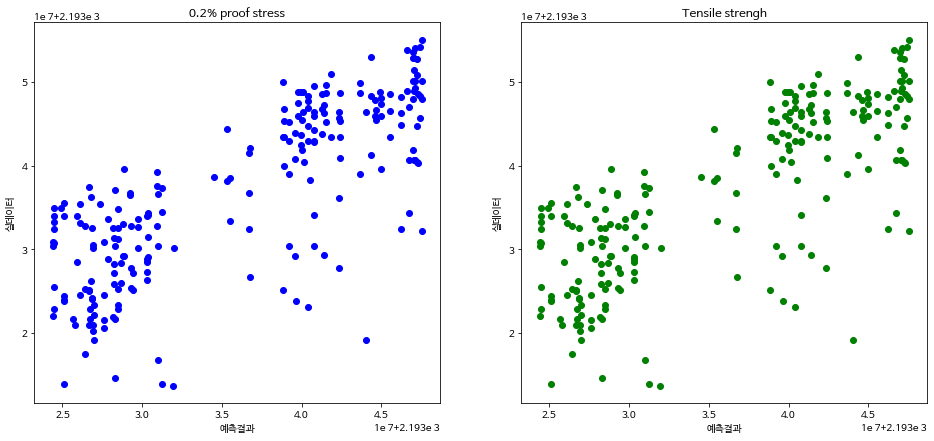

In [ ]:
# 예측 데이터와 실제 데이터를 이용해 그래프로 시각화.
fig, (an1,an2) = plt.subplots(1,2,figsize=(16,7))

an1.scatter(predict_stress, a_stress, color = 'blue')

an1.set_title('0.2% proof stress')
an1.set_xlabel('예측결과')
an1.set_ylabel('실데이터')


an2.scatter(predict_stress, a_stress, color = 'green')
an2.set_title('Tensile strengh')
an2.set_xlabel('예측결과')
an2.set_ylabel('실데이터')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, '실데이터')

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


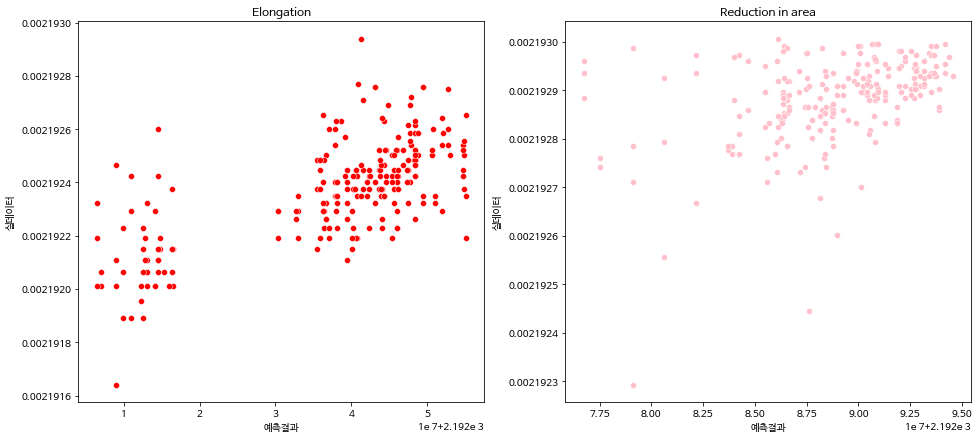

In [ ]:
fig, (an3,an4) = plt.subplots(1,2,figsize=(16,7))

sns.scatterplot(predict_elongation, a_elongation, color = 'red', ax = an3)
an3.set_title('Elongation')
an3.set_xlabel('예측결과')
an3.set_ylabel('실데이터')


sns.scatterplot(predict_reduction_area, a_reduction_area, color = 'pink', ax = an4)
an4.set_title('Reduction in area')
an4.set_xlabel('예측결과')
an4.set_ylabel('실데이터')

In [ ]:
# 각 물성에 대한 결정계수 계산
r2_stress = r2_score(a_stress, predict_stress)
r2_tensile_strength = r2_score(a_tensile_strength, predict_tensile_strength)
r2elongation = r2_score(a_elongation, predict_elongation)
r2_reduction_area = r2_score(a_reduction_area, predict_reduction_area)

In [ ]:
print(r2_stress)
print(r2_tensile_strength)
print(r2elongation)
print(r2_reduction_area)

0.5966084754850087
0.14604441329178242
0.4768320168560053
0.17280898144919365
